# <font color=darkgreen>Análisis de los patrones de movilidad residencial en España<br>mediante árboles de clasificación
</font>

### <font color=darkgreen>Trabajo de Fin de [Máster en Data Science](https://masterdatascience.ifca.es/)</font>  
### <font color=darkgreen>© Autor: Matin Khakpour</font>

## <font color=darkgreen>Capítulo 2: Análisis descriptivo de EVR</font>    

El dataset original se puede descargar desde el portal del [INE](https://www.ine.es/ftp/microdatos/varires/datos_2019.zip). Dentro del fichero zip de microdatos, hay que entrar en la carpeta `CSV` donde está el fichero `EVR_2019.csv`.

## Cargar el dataset  
Se trata de un fichero csv separado por TABULACIÓN.

In [ ]:
library(readr)
library(ggplot2)

In [2]:
db <- read_tsv(choose.files())

Parsed with column specification:
cols(
  SEXO = col_double(),
  PROVNAC = col_character(),
  MUNINAC = col_character(),
  EDAD = col_double(),
  MESNAC = col_double(),
  ANONAC = col_double(),
  CNAC = col_double(),
  PROVALTA = col_character(),
  MUNIALTA = col_character(),
  MESVAR = col_double(),
  ANOVAR = col_double(),
  PROVBAJA = col_character(),
  MUNIBAJA = col_character(),
  TAMUALTA = col_double(),
  TAMUBAJA = col_double(),
  TAMUNACI = col_double()
)


In [3]:
dim(db)

[1] 2868942      16

In [4]:
head(db)

SEXO,PROVNAC,MUNINAC,EDAD,MESNAC,ANONAC,CNAC,PROVALTA,MUNIALTA,MESVAR,ANOVAR,PROVBAJA,MUNIBAJA,TAMUALTA,TAMUBAJA,TAMUNACI
1,01,NA,4,4,2015,108,01,NA,7,2019,01,NA,1,1,1
6,01,NA,1,4,2018,108,01,NA,7,2019,01,NA,1,1,1
1,01,NA,36,6,1982,108,01,NA,3,2019,01,NA,1,1,1
1,01,NA,26,3,1993,108,01,059,5,2019,01,NA,6,1,1
6,01,NA,37,6,1982,108,01,059,6,2019,01,NA,6,1,1
6,01,NA,75,1,1944,108,01,059,1,2019,01,NA,6,1,1


In [5]:
colnames(db)

[1] "SEXO"     "PROVNAC"  "MUNINAC"  "EDAD"     "MESNAC"   "ANONAC"  
 [7] "CNAC"     "PROVALTA" "MUNIALTA" "MESVAR"   "ANOVAR"   "PROVBAJA"
[13] "MUNIBAJA" "TAMUALTA" "TAMUBAJA" "TAMUNACI"

## Análisis estructural de variables

In [4]:
str(db)

tibble [2,868,942 x 16] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ SEXO    : num [1:2868942] 1 6 1 1 6 6 1 1 6 6 ...
 $ PROVNAC : chr [1:2868942] "01" "01" "01" "01" ...
 $ MUNINAC : chr [1:2868942] NA NA NA NA ...
 $ EDAD    : num [1:2868942] 4 1 36 26 37 75 14 11 28 9 ...
 $ MESNAC  : num [1:2868942] 4 4 6 3 6 1 7 11 10 1 ...
 $ ANONAC  : num [1:2868942] 2015 2018 1982 1993 1982 ...
 $ CNAC    : num [1:2868942] 108 108 108 108 108 108 108 108 108 108 ...
 $ PROVALTA: chr [1:2868942] "01" "01" "01" "01" ...
 $ MUNIALTA: chr [1:2868942] NA NA NA "059" ...
 $ MESVAR  : num [1:2868942] 7 7 3 5 6 1 9 1 12 1 ...
 $ ANOVAR  : num [1:2868942] 2019 2019 2019 2019 2019 ...
 $ PROVBAJA: chr [1:2868942] "01" "01" "01" "01" ...
 $ MUNIBAJA: chr [1:2868942] NA NA NA NA ...
 $ TAMUALTA: num [1:2868942] 1 1 1 6 6 6 6 6 6 6 ...
 $ TAMUBAJA: num [1:2868942] 1 1 1 1 1 1 1 1 1 1 ...
 $ TAMUNACI: num [1:2868942] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   SEXO = col_double(),
  ..   PRO

Encontrar todas las variables que contienen algún valor nulo:

In [225]:
colnames(db)[apply(db, 2, anyNA)]

[1] "MUNINAC"  "MUNIALTA" "MUNIBAJA" "TAMUALTA" "TAMUBAJA" "TAMUNACI"

Contar el número de los valores nulos en cada columna:

In [4]:
sapply(db, function(x) sum(is.na(x)))

SEXO  PROVNAC  MUNINAC     EDAD   MESNAC   ANONAC     CNAC PROVALTA 
       0        0   224362        0        0        0        0        0 
MUNIALTA   MESVAR   ANOVAR PROVBAJA MUNIBAJA TAMUALTA TAMUBAJA TAMUNACI 
  505738        0        0        0   424934   345749   873842  1614660

## Transformación de variables y tratamiento inicial de los nulos

- Convertir las variables oportunas a categórica:  
Incluimos los nulos coma una clase más, porque luego queremos calcular su proporción al respecto de los demás valores.  
`addNA()` nos permite hacer ambas cosas a la vez, sin cambiar las etiquetas al tipo numérico.  
Esto se aplica a **MUNINAC, MUNIALTA, MUNIBAJA, TAMUALTA, TAMUBAJA, TAMUNACI**  

  
- Otras variables tipo `chr`, de momento no las convertimos a numérico, porque puede ser que más adelante necesitemos hacer alguna transformación textual con ellas (**PROVNAC, PROVALTA, PROVBAJA**)  

El resto de las variables son numéricas y de momento las usamos sin factorizarlas (**SEXO, EDAD, MESNAC, ANONAC, CNAC, MESVAR, ANOVAR**)

In [3]:
db$SEXO <- factor(db$SEXO, label=c("V","M")) #solo cambiamos sus etiquetas

db$MUNINAC <- addNA(db$MUNINAC)

db$MUNIALTA <- addNA(db$MUNIALTA)

db$MUNIBAJA <- addNA(db$MUNIBAJA)

db$TAMUALTA <- addNA(db$TAMUALTA)

db$TAMUBAJA <- addNA(db$TAMUBAJA)

db$TAMUNACI <- addNA(db$TAMUNACI)

Guardamos los cambios en un fichero nuevo para poder usarlo más adelante:

In [6]:
write.table(db, file = "db_fase1.tsv", row.names=FALSE, sep="\t")

## Visualización de las variables

### **#1 SEXO**

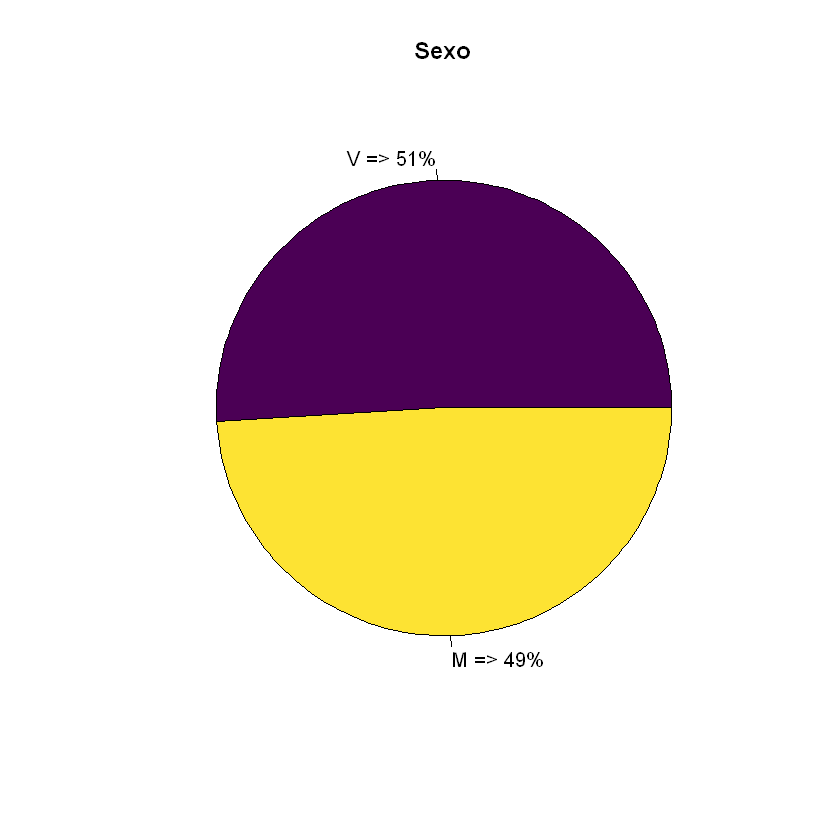

In [9]:
aux <- table(db$SEXO)
aux <- as.data.frame(aux)

slices <- aux$Freq
lbl <- aux$Var1
pct <- round(slices/sum(slices)*100)
lbl <- paste(lbl, "=>", pct)
lbl <- paste(lbl,"%", sep="")
pie(slices, labels = lbl, col = hcl.colors(length(lbl)),
    main="Sexo")

### **#2 PROVNAC**

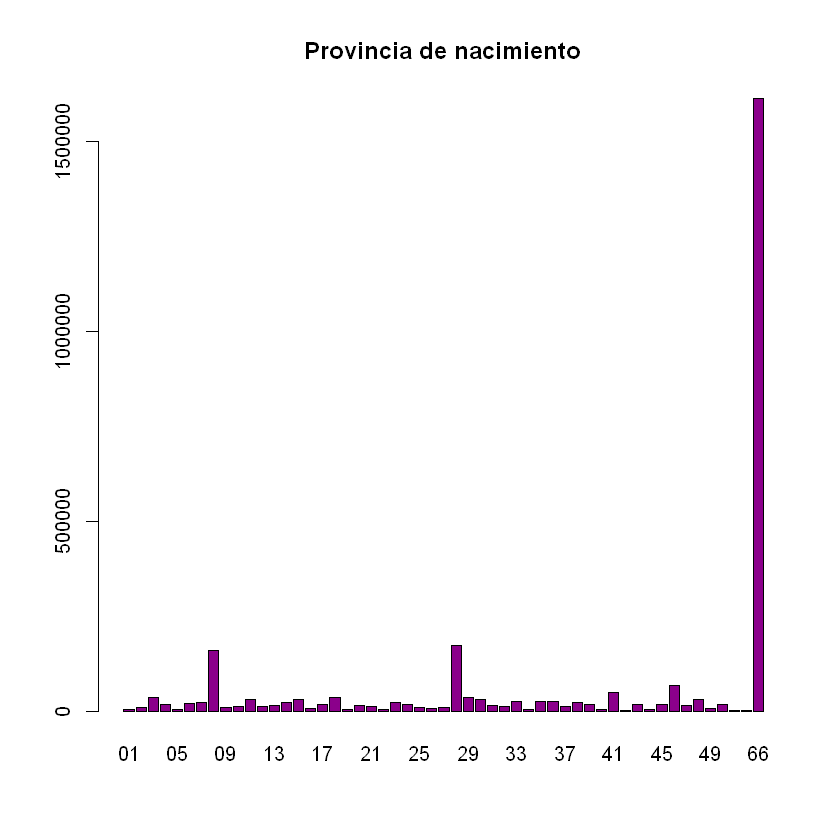

In [18]:
barplot(table(db$PROVNAC), main="Provincia de nacimiento", col="darkmagenta")

Observamos que un alto porcentaje de todos las variaciones son las personas nacidas en extranjero (PROVNAC = 66). ¿Cuánto?

In [33]:
aux <- round(nrow(db[db$PROVNAC == "66",])/nrow(db)*100,1)
paste("Proporción de nacidos en extranjero:", aux, "%")

[1] "Proporción de nacidos en extranjero: 56.3 %"

### **#3 MUNINAC**

Visualizar esta variable como tal no aporta información, porque los códigos son parecidos para los municipios españoles y extranjeros y para los municipios españoles entre sí.

### **#4 EDAD**

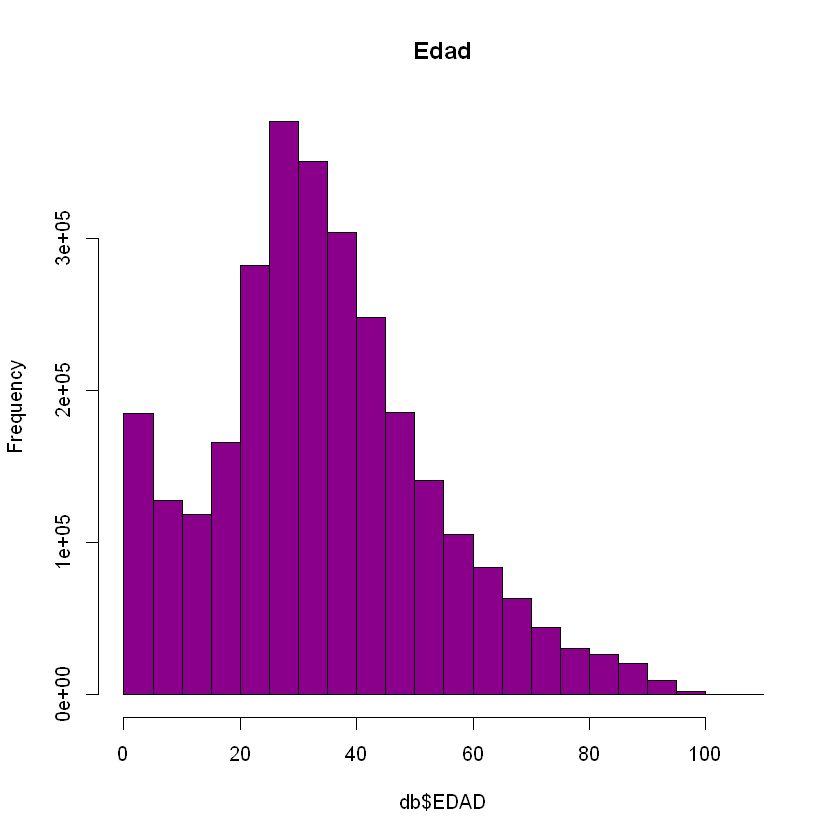

In [22]:
hist(db$EDAD, main="Edad", col="darkmagenta")

### **#5 MESNAC**

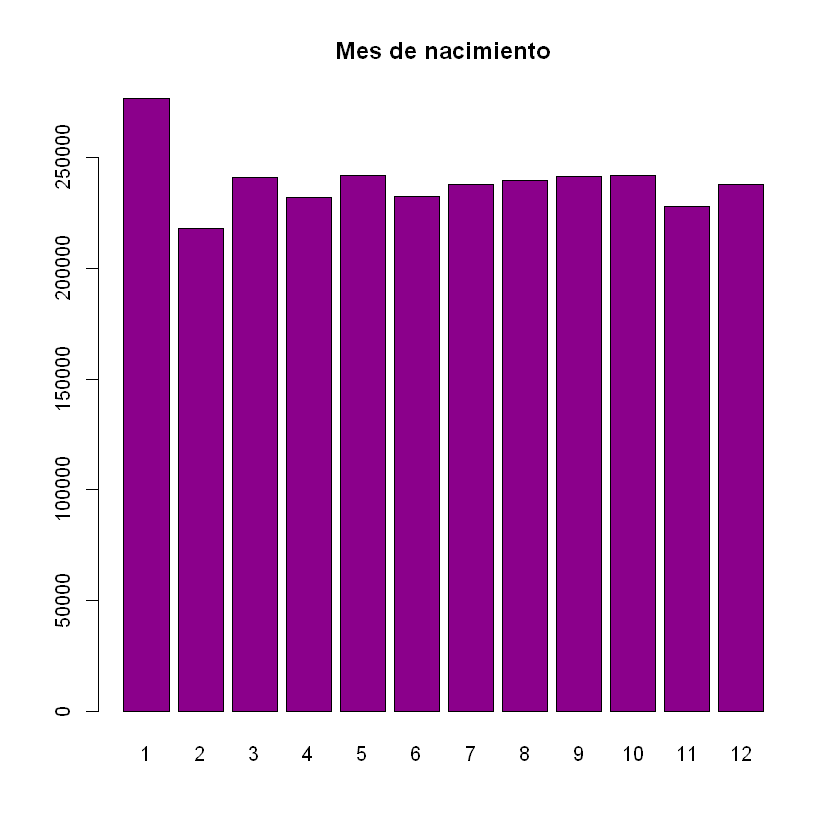

In [24]:
barplot(table(db$MESNAC), main="Mes de nacimiento", col="darkmagenta")

### **#6 ANONAC**

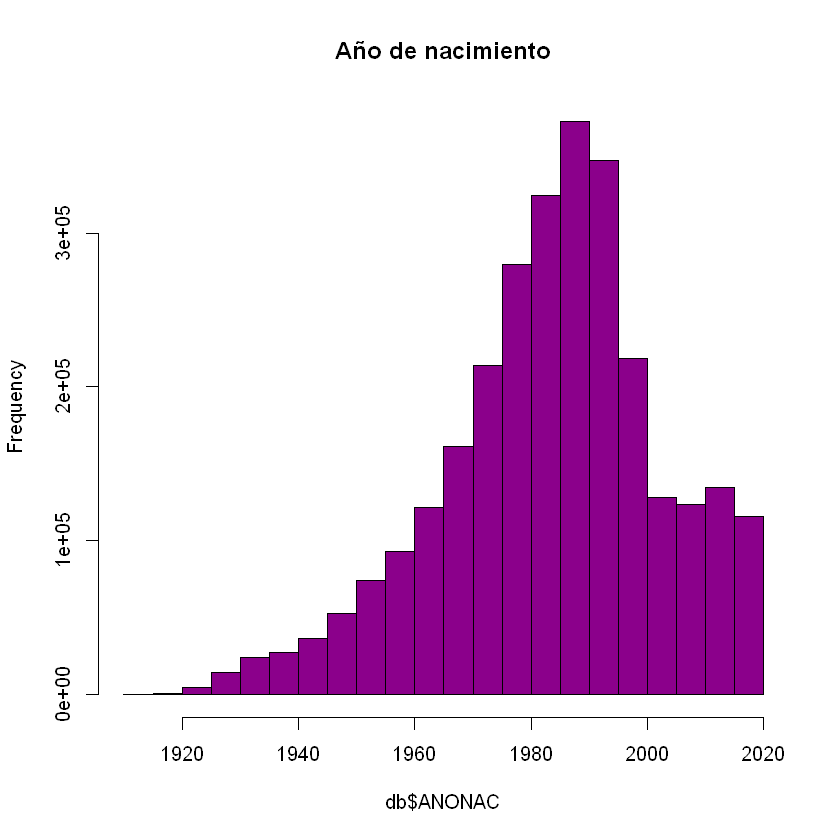

In [25]:
hist(db$ANONAC, main="Año de nacimiento", col="darkmagenta")

### **#7 CNAC**

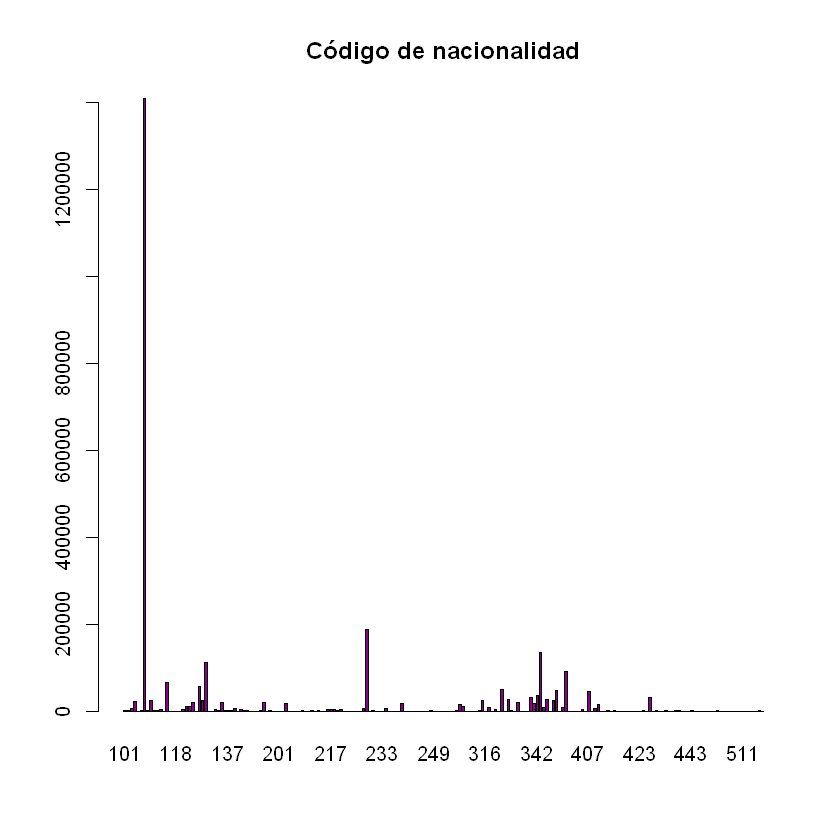

In [26]:
barplot(table(db$CNAC), main="Código de nacionalidad", col="darkmagenta")

El bin más alto es el del código 108 (España). Vemos su proporción:

In [228]:
aux <- round(nrow(db[db$CNAC == "108",])/nrow(db)*100,1)
paste("Proporción de ciudadanos con nacionalidad española:", aux, "%")

# aux <- round(nrow(db[db$CNAC != "108",])/nrow(db)*100,1)
# paste("Proporción de ciudadanos con nacionalidad extranjera:", aux, "%")

[1] "Proporción de ciudadanos con nacionalidad española: 49.1 %"

[1] "Proporción de ciudadanos con nacionalidad extranjera: 50.9 %"

Suponiendo que en España unos 12% de la población son extranjeros, es una edivencia de que en el caso de las variaciones residenciales, los extranjeros tienen una proporción bastante más alta que su representación demográfica.

### **#8 PROVALTA**

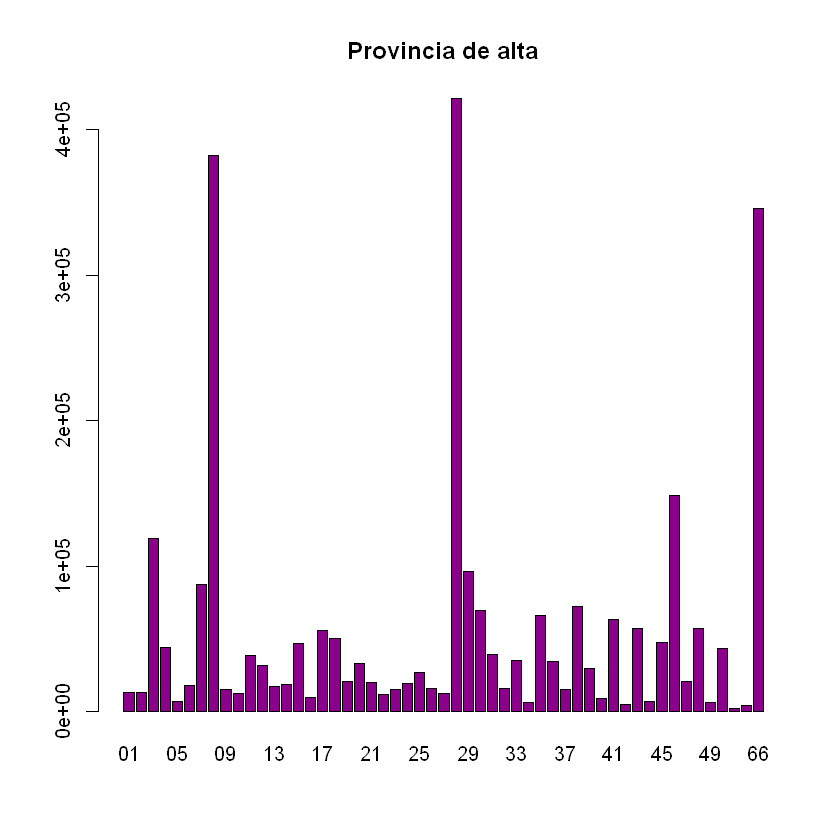

In [28]:
barplot(table(db$PROVALTA), main="Provincia de alta", col="darkmagenta")

El último bin de la derecha corresponde a variaciones con destino extranjero.

In [35]:
aux <- round(nrow(db[db$PROVALTA == "66",])/nrow(db)*100,1)
paste("Proporción de alta en extranjero:", aux, "%")

aux <- round(nrow(db[db$PROVALTA != "66",])/nrow(db)*100,1)
paste("Proporción de alta en España:", aux, "%")

[1] "Proporción de alta en extranjero: 12.1 %"

[1] "Proporción de alta en España: 87.9 %"

### **#9 MUNIALTA**

El mismo caso que vimos para MUNINAC; primero habrá que agruparlo según provincia.

### **#10 MESVAR**

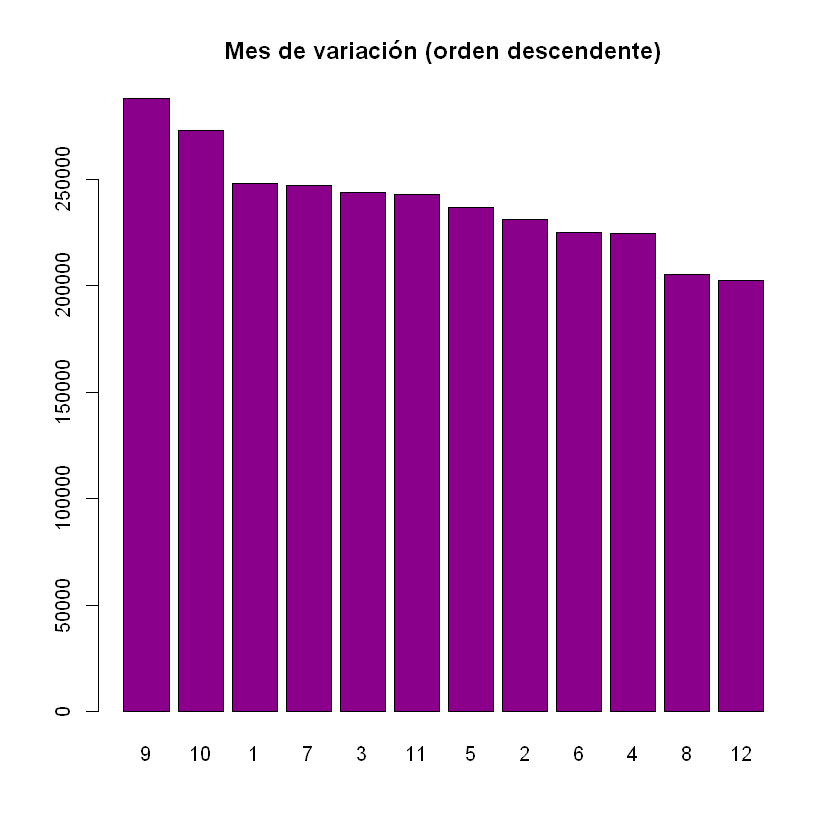

In [31]:
barplot(sort(table(db$MESVAR),decreasing=TRUE), main="Mes de variación (orden descendente)", col="darkmagenta")

### **#11 ANOVAR**

Obviamente en este dataset todas las variaciones son del año 2019.

### **#12 PROVBAJA**

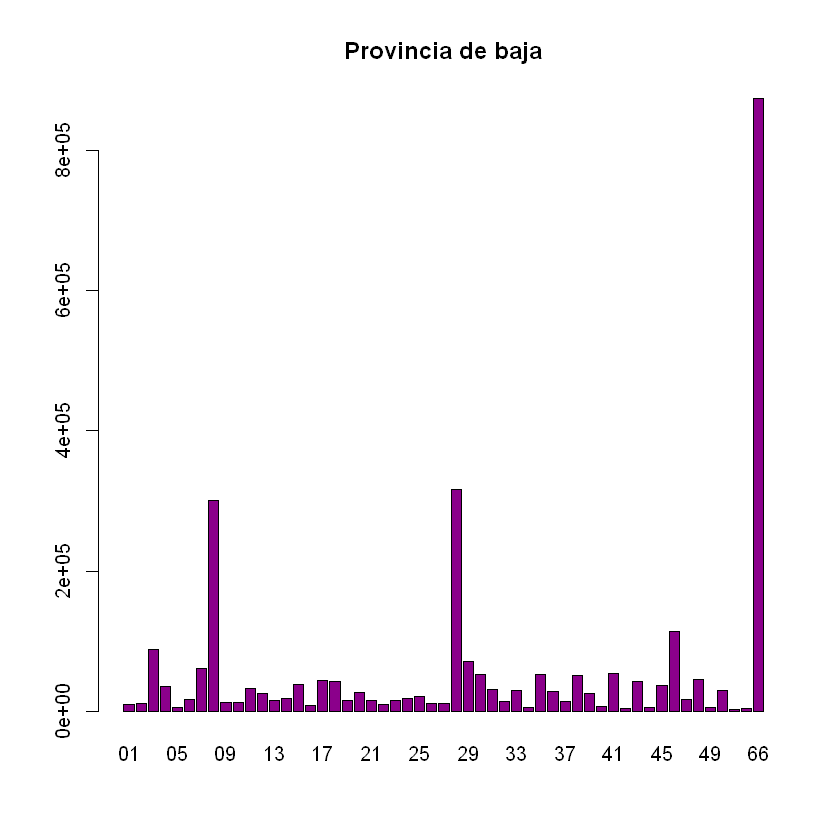

In [32]:
barplot(table(db$PROVBAJA), main="Provincia de baja", col="darkmagenta")

El último bin de la derecha corresponde a variaciones con origen extranjero.

In [36]:
aux <- round(nrow(db[db$PROVBAJA == "66",])/nrow(db)*100,1)
paste("Proporción de baja en extranjero:", aux, "%")

aux <- round(nrow(db[db$PROVBAJA != "66",])/nrow(db)*100,1)
paste("Proporción de baja en España:", aux, "%")

[1] "Proporción de baja en extranjero: 30.5 %"

[1] "Proporción de baja en España: 69.5 %"

### **#13 MUNIBAJA**

El mismo caso de MUNINAC y MUNIALTA.

### **#14 TAMUALTA**

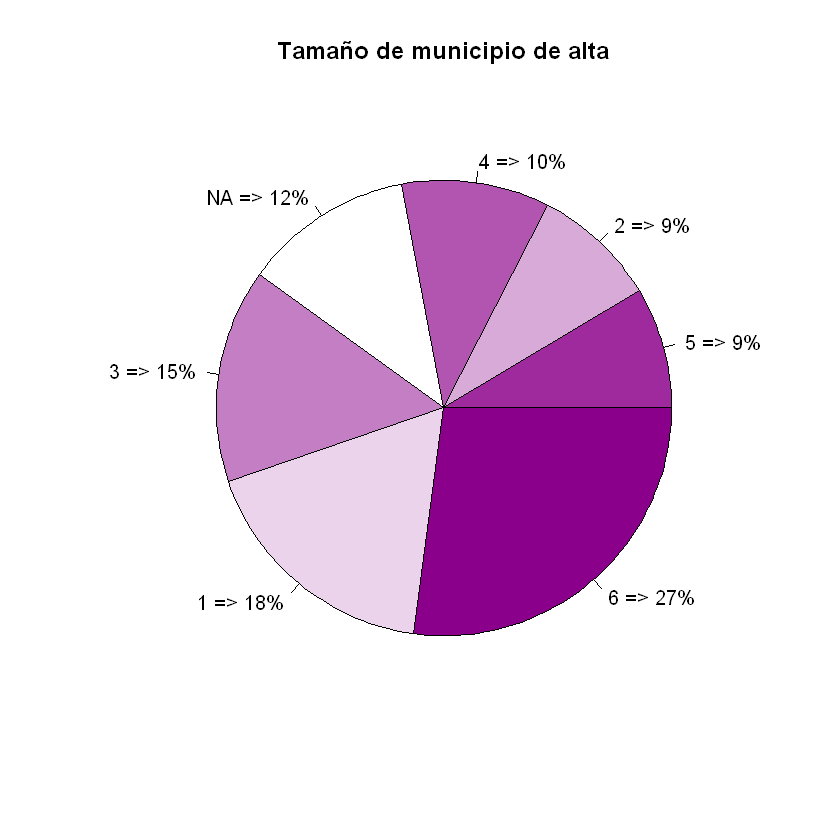

In [113]:
aux <- sort(table(db$TAMUALTA))
aux <- as.data.frame(aux)

colfunc <- colorRampPalette(c("white","darkmagenta"))(7)

slices <- aux$Freq
lbl <- aux$Var1
pct <- round(slices/sum(slices)*100)
lbl <- paste(lbl, "=>", pct)
lbl <- paste(lbl,"%", sep="")
pie(slices, labels = lbl, col = c(colfunc[6],colfunc[3],colfunc[5],"#00000000",colfunc[4],colfunc[2],colfunc[7]),
    main="Tamaño de municipio de alta")

### **#15 TAMUBAJA**

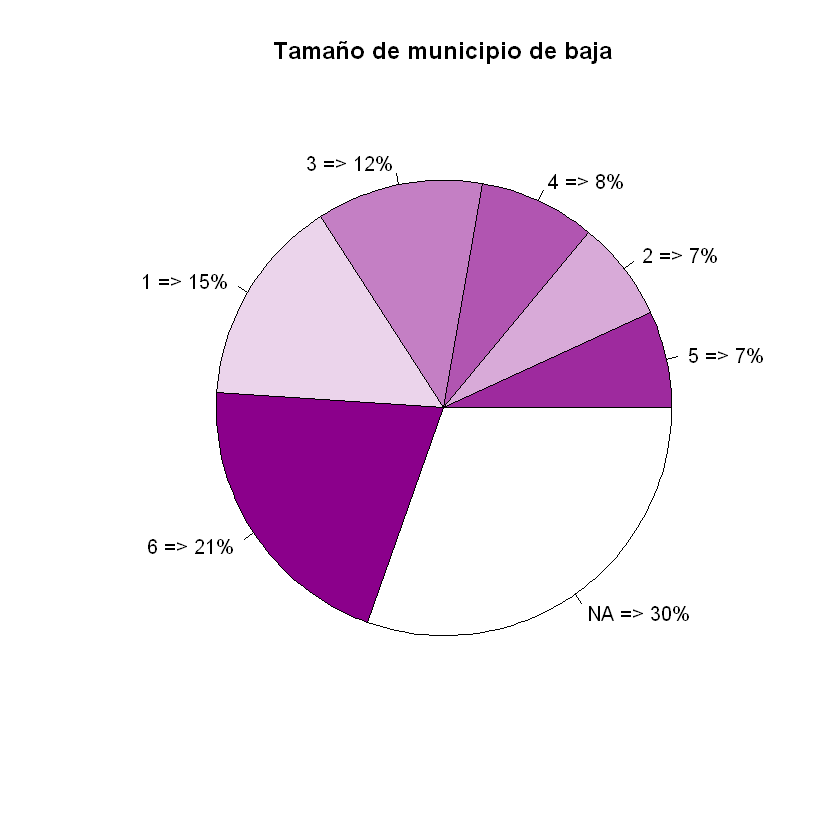

In [4]:
aux <- sort(table(db$TAMUBAJA))
aux <- as.data.frame(aux)

colfunc <- colorRampPalette(c("white","darkmagenta"))(7)

slices <- aux$Freq
lbl <- aux$Var1
pct <- round(slices/sum(slices)*100)
lbl <- paste(lbl, "=>", pct)
lbl <- paste(lbl,"%", sep="")
pie(slices, labels = lbl, col = c(colfunc[6],colfunc[3],colfunc[5],colfunc[4],colfunc[2],colfunc[7],"#00000000"),
    main="Tamaño de municipio de baja")

Es importante observar que, dentro de España, la tendencia entre las categorías poblacionales de municipios de origen es la misma que los municipios de destino; Por orden descendente: 6 -> 1 -> 3 -> 4 -> 2 -> 5  

### **#16 TAMUNAC**

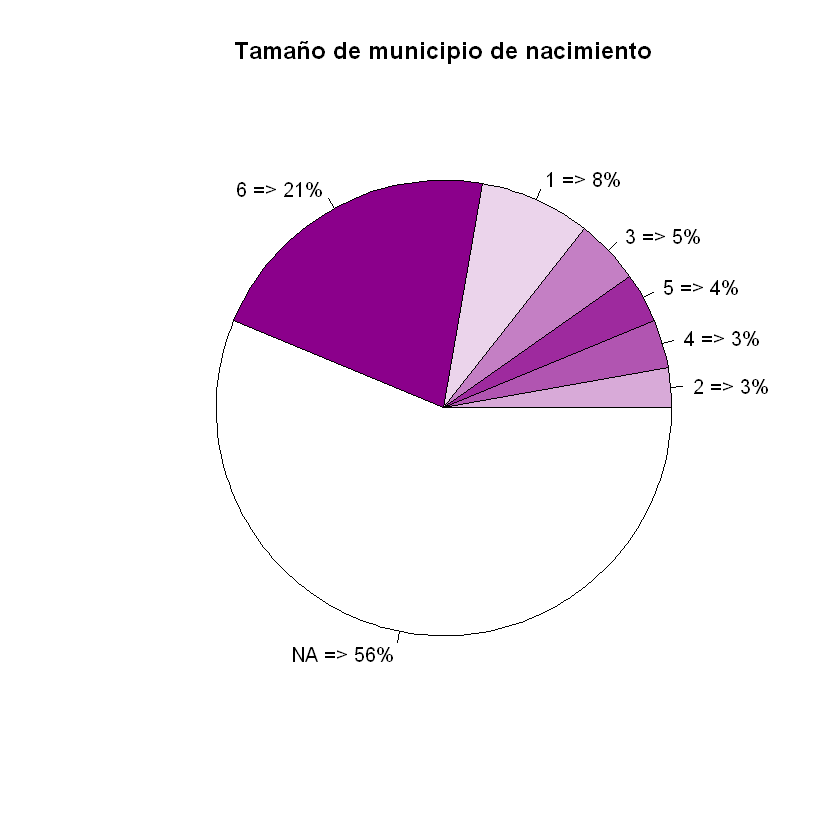

In [5]:
aux <- sort(table(db$TAMUNACI))
aux <- as.data.frame(aux)

colfunc <- colorRampPalette(c("white","darkmagenta"))(7)

slices <- aux$Freq
lbl <- aux$Var1
pct <- round(slices/sum(slices)*100)
lbl <- paste(lbl, "=>", pct)
lbl <- paste(lbl,"%", sep="")
pie(slices, labels = lbl, col = c(colfunc[3],colfunc[5],colfunc[6],colfunc[4],colfunc[2],colfunc[7],"#00000000"),
    main="Tamaño de municipio de nacimiento")

Ya habíamos visto que 56.3% de las personas mudadas son los nacidos en extranjero y entonces aquí desconocemos la información poblacional de su municipio de nacimiento.  

## Visualización analítica

En el segundo paso, generamos algunas otras visualizaciones mediante subconjuntos y agrupaciones de variables, de manera que nos puedan aportar alguna información añadida o perspicacia nueva.

### Tabla de frecuencia de variaciones entre provincias
Intentamos ver si hay alguna correlación entre algunos pares de origen y destino.  
  
Lo medimos mediante **provincias** tanto españoles como extranjeros (=66) y no **municipios**, porque como explicamos antes, el código de los municipios no es directamente interpretable.

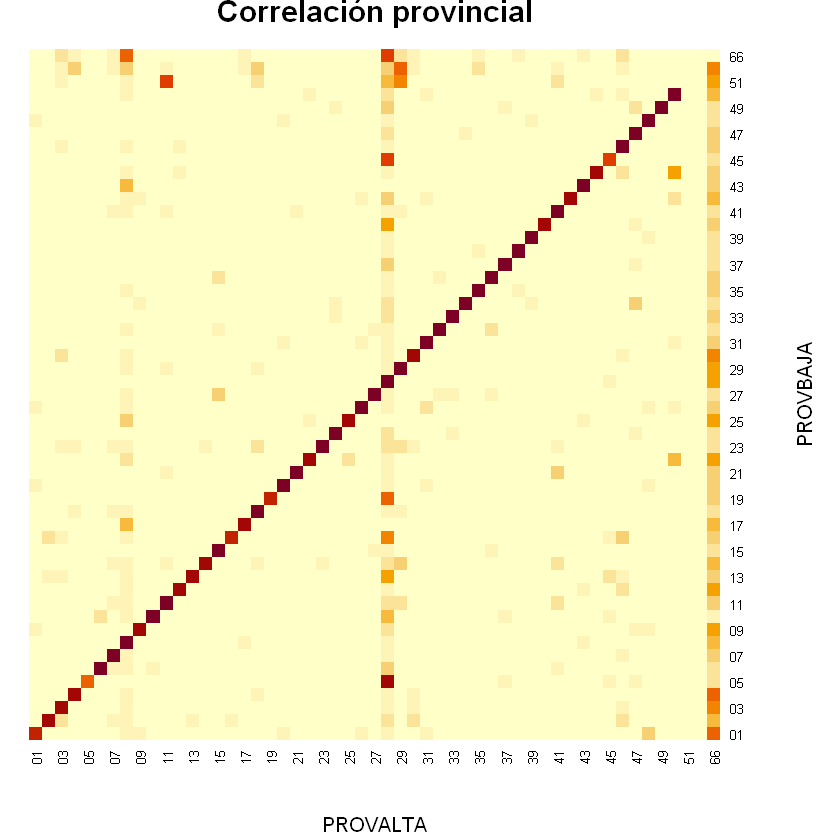

In [83]:
aux <- xtabs(~PROVBAJA+PROVALTA, db)

heatmap(aux, Colv = NA, Rowv = NA, xlab="PROVALTA", ylab="PROVBAJA", main="Correlación provincial")

A simple vista, entendemos que muchas de las variaciones se hacen dentro de la misma provincia. ¿Cuánto?

In [35]:
sub_intra <- subset(db, PROVALTA == PROVBAJA)

aux <- round(nrow(sub_intra)/nrow(db)*100,1)

paste("Proporción de variaciones INTRA-provincial:", aux, "%")

[1] "Proporción de variaciones INTRA-provincial: 34.7 %"

Estas variaciones **intra-provinciales**, ¿En qué provincias son más frecuentes?

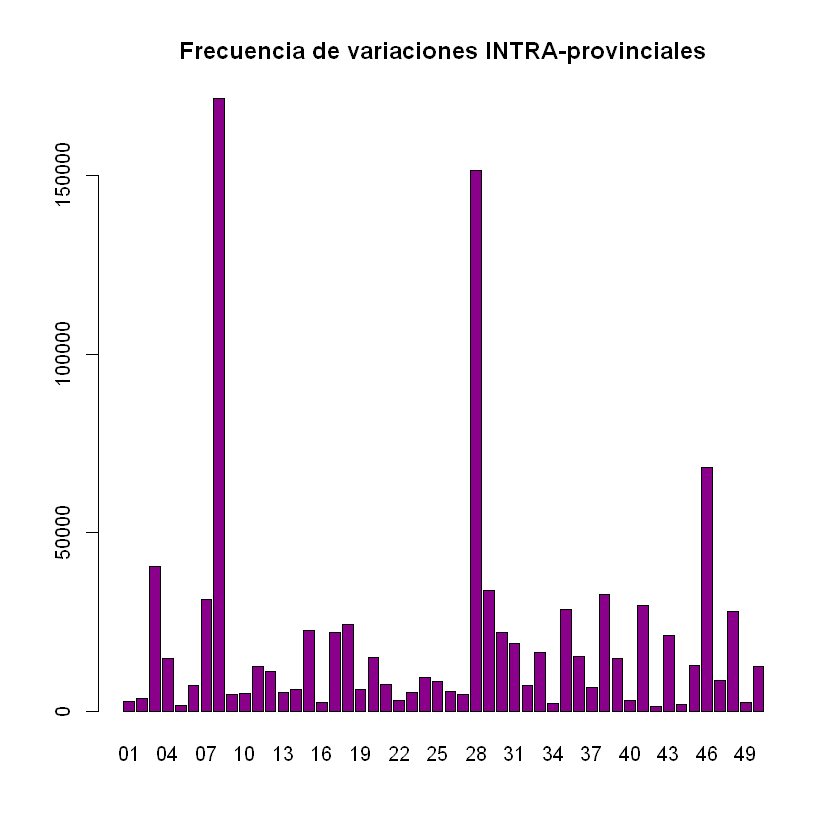

In [46]:
barplot(table(sub_intra$PROVBAJA), main="Frecuencia de variaciones INTRA-provinciales", col="darkmagenta")

Las principales provincias con flujo interior son 08 (Barcelona), 28 (Madrid) y 46 (Valencia).

Ahora dividimos las variaciones **inter-provinciales** en otro subset:

In [36]:
sub_inter <- subset(db, PROVALTA != PROVBAJA)

# Obviamente tendrá el porcentaje complemento al anterior
aux <- round(nrow(sub_inter)/nrow(db)*100,1)

paste("Proporción de variaciones INTER-provincial:", aux, "%")

[1] "Proporción de variaciones INTER-provincial: 65.3 %"

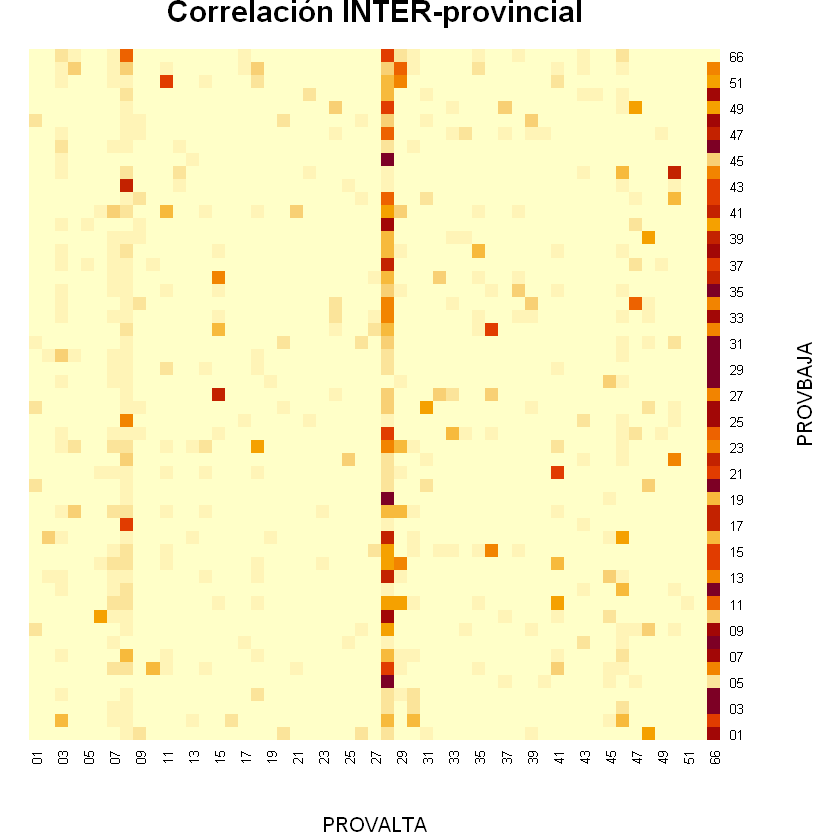

In [101]:
aux <- xtabs(~PROVBAJA+PROVALTA, sub_inter)

heatmap(aux, Colv = NA, Rowv = NA, xlab="PROVALTA", ylab="PROVBAJA", main="Correlación INTER-provincial")

Algunas inferencias:  

- La primera fila de arriba muestra que las variaciones con origen extranjero mayormente se afincan en provincias 28 (Madrid) y 08 (Barcelona).  
  
  
- La columna del medio muestra que Madrid es, con diferencia, el destino más frecuentado y que sus llegadas provienen de todas provincias, pero siendo algunas más destacadas como 05 (Ávila), 19 (Guadalajara) y 45 (Toledo).  
Es decir, sus provincias vecinas.  
  
  
- La primera columna de la derecha, muestra que las variaciones con destino extranjero están extendidas entre muchas provincias de origen. Las pintamos en concreto para entender "las personas que se van al extranjero ¿desde qué provincias se van?"

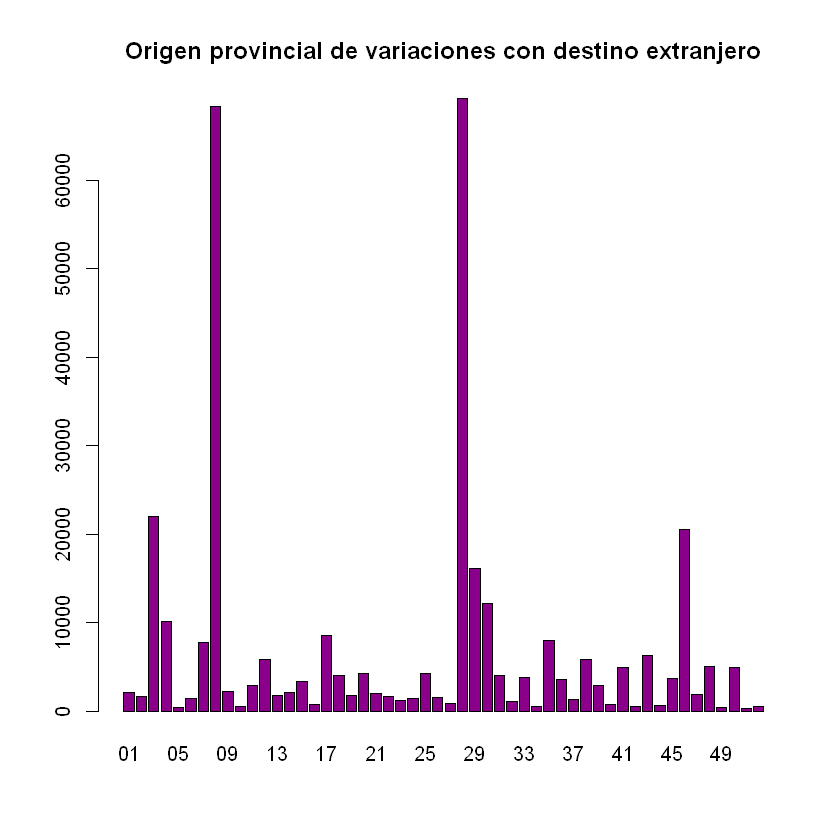

In [50]:
sub_DEST_EX <- subset(sub_inter, PROVALTA == "66")

barplot(table(sub_DEST_EX$PROVBAJA), main="Origen provincial de variaciones con destino extranjero", col="darkmagenta")

Hacemos la inversa; "las personas que vienen del extranjero ¿en qué provincias se afincan?"

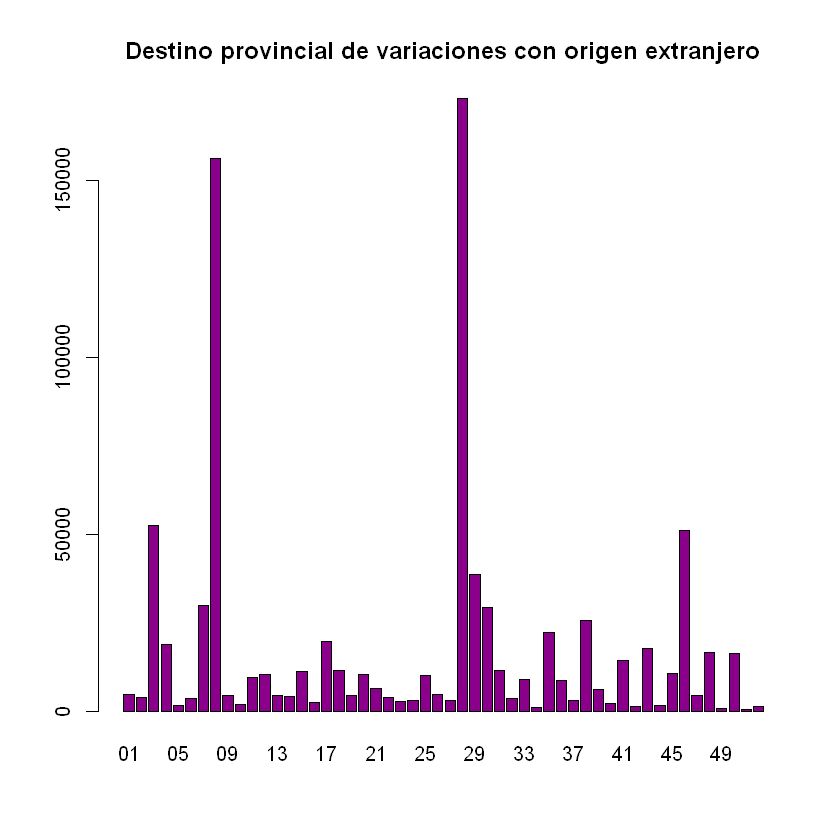

In [51]:
sub_ORIG_EX <- subset(sub_inter, PROVBAJA == "66")

barplot(table(sub_ORIG_EX$PROVALTA), main="Destino provincial de variaciones con origen extranjero", col="darkmagenta")

Lo suyo es combinar estas dos últimas gráficas en una. Así además notamos la diferencia entre número de variaciones en cada caso:

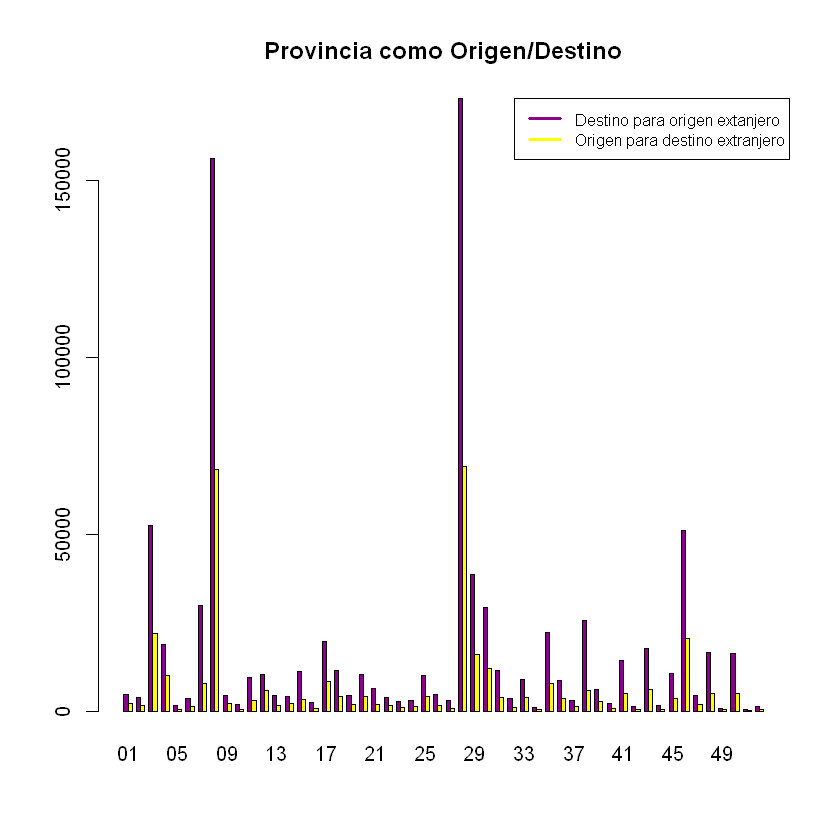

In [52]:
a <- table(sub_ORIG_EX$PROVALTA)
b <- table(sub_DEST_EX$PROVBAJA)

c <- rbind(a,b)

barplot(c, beside=TRUE, col=c("darkmagenta","yellow"), main="Provincia como Origen/Destino")
legend("topright",
       c("Destino para origen extanjero", "Origen para destino extranjero"),
       col=c("darkmagenta", "yellow"),
       lwd=3, cex = 0.8, text.width = 50)

Notable que la tendencia es muy parecida en ambos casos, aunque la proporción es bastante diferente.

Ya habíamos visto el histograma de edad, pero vendrá bien añadirle la media muestral (migrantes) y poblacional (edad media en España en 2019). También dibujamos una curva de distribución normal con la misma media muestral.

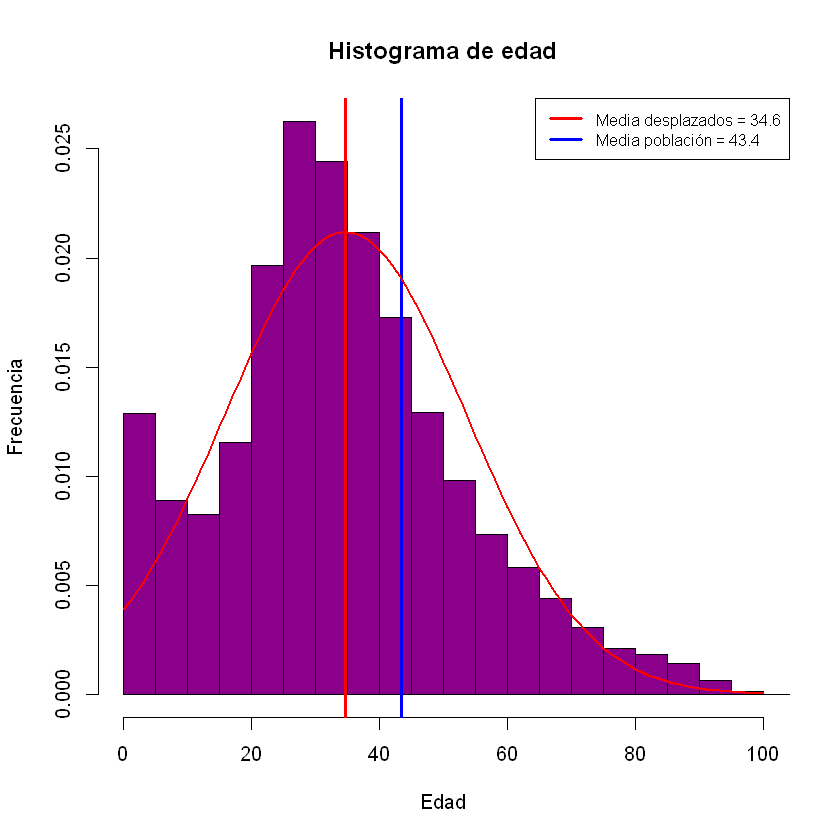

In [92]:
hist(db$EDAD, main="Histograma de edad", 
     xlab = "Edad", ylab = "Frecuencia",
     border = "black", col = "darkmagenta",
     xlim = c(0,100), freq=FALSE)
abline(v=mean(db$EDAD), col="red", lwd=3)
abline(v=43.4, col="blue", lwd=3)
legend("topright",
       c("Media desplazados = 34.6", "Media población = 43.4"),
       col=c("red", "blue"),
       lwd=3, cex = 0.8, text.width = 29)
media <- mean(db$EDAD)
des <- sd(db$EDAD)
x <- runif(n = 1000, min=0, max=100)
curve(dnorm(x = x, mean=media, sd=des), col="red", lwd=2, add=TRUE)

Llamativa la diferencia de casi 9 años entre los desplazados y la población general.  
Mediante un test de hipótesis, comprobamos si la diferencia observada es estadísticamente significativa.  
Pero antes hay que comprobar la normalidad de la distribución.

$$
\begin{array}{c}
H_0 : \mu_d = \mu_p  = 43.4  \\\
H_1 : \mu_d < \mu_p \\\
\end{array}
$$

In [6]:
ks.test(db$EDAD, "pnorm", mean(db$EDAD), sd(db$EDAD))

Warning message in ks.test(db$EDAD, "pnorm", mean(db$EDAD), sd(db$EDAD)):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  db$EDAD
D = 0.054662, p-value < 2.2e-16
alternative hypothesis: two-sided


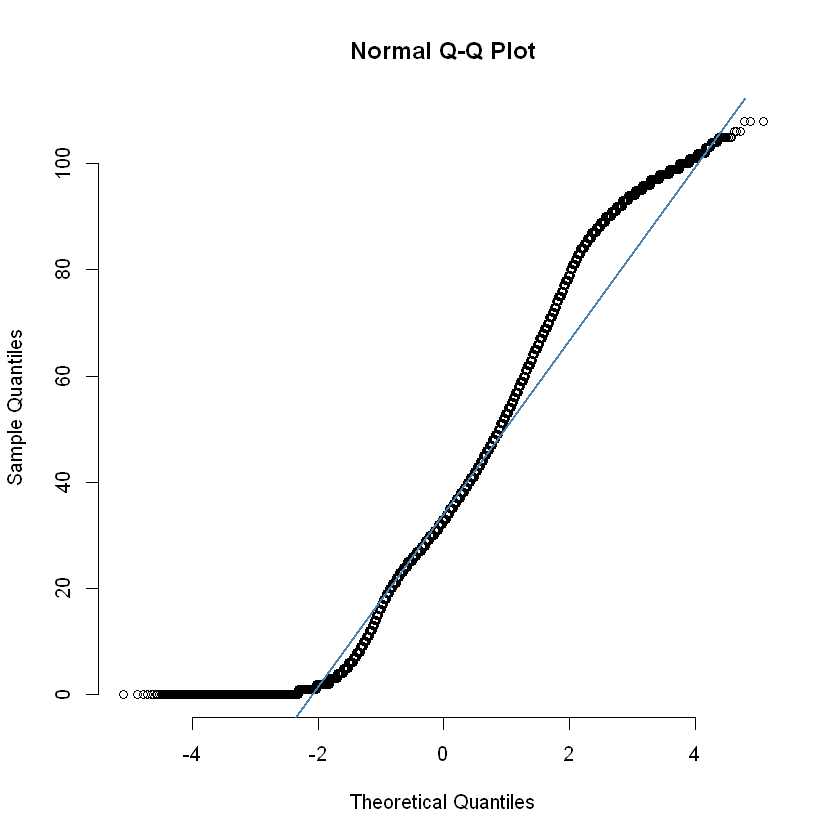

In [13]:
qqnorm(db$EDAD, pch = 1, frame = FALSE)
qqline(db$EDAD, col = "steelblue", lwd = 2)

Como la distribución no es normal, en vez de t-student usamos la prueba de Wilcoxon:

In [25]:
wilcox.test(db$EDAD, mu = 43.4, alternative = "less")


	Wilcoxon signed rank test with continuity correction

data:  db$EDAD
V = 1.0147e+12, p-value < 2.2e-16
alternative hypothesis: true location is less than 43.4


Podemos comprobar la edad según la categoría poblacional del municipio de destino.  
Es decir, en cada franja de edad, ¿a qué tipo de municipio se mudan las personas?

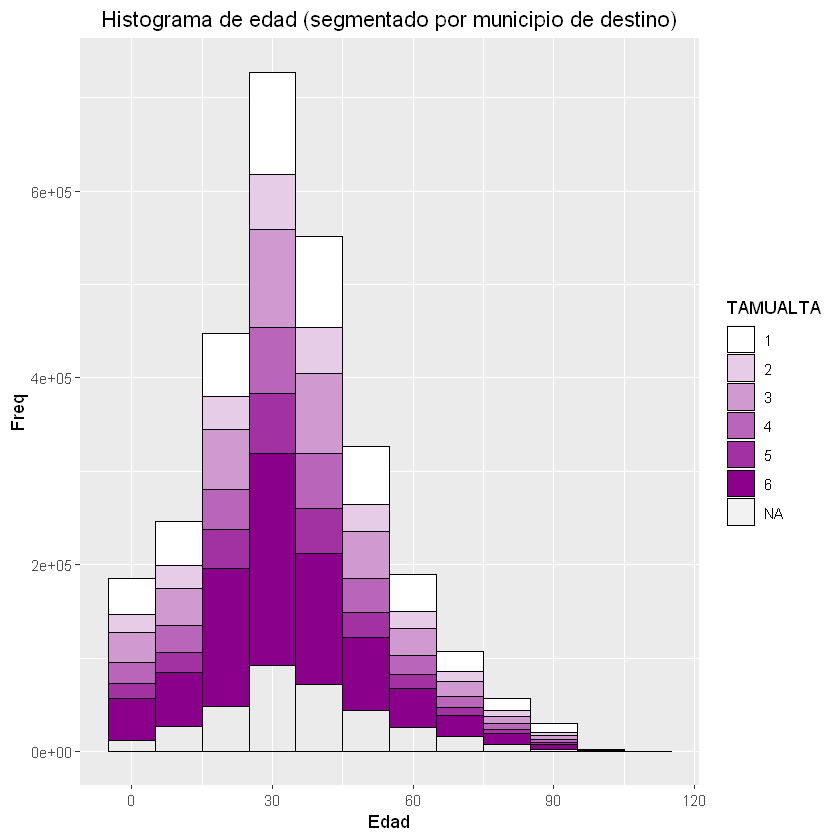

In [58]:
colfunc <- colorRampPalette(c("white","darkmagenta"))

ggplot(db, aes(x=EDAD, fill=TAMUALTA)) +
scale_fill_manual(values=colfunc(6)) +
geom_histogram(binwidth = 10, col = "black") +
labs(title = "Histograma de edad (segmentado por municipio de destino)", x="Edad", y="Freq") +
theme(plot.title = element_text(hjust = 0.5))

Es interesante ver que las categorías se mantienen en todas franjas de edad. Es decir, todas las personas, incluso las más jóvenes, se mudan primero hacia capitales de provincia y luego hacia municipios de menos de 10,000 habitantes. No es que, por ejemplo, éstos sean únicamente destino de los más mayores.  

Naturalmente surge la pregunta inversa; En cada franja de edad, ¿desde qué tipo de municipio se mudan las personas?

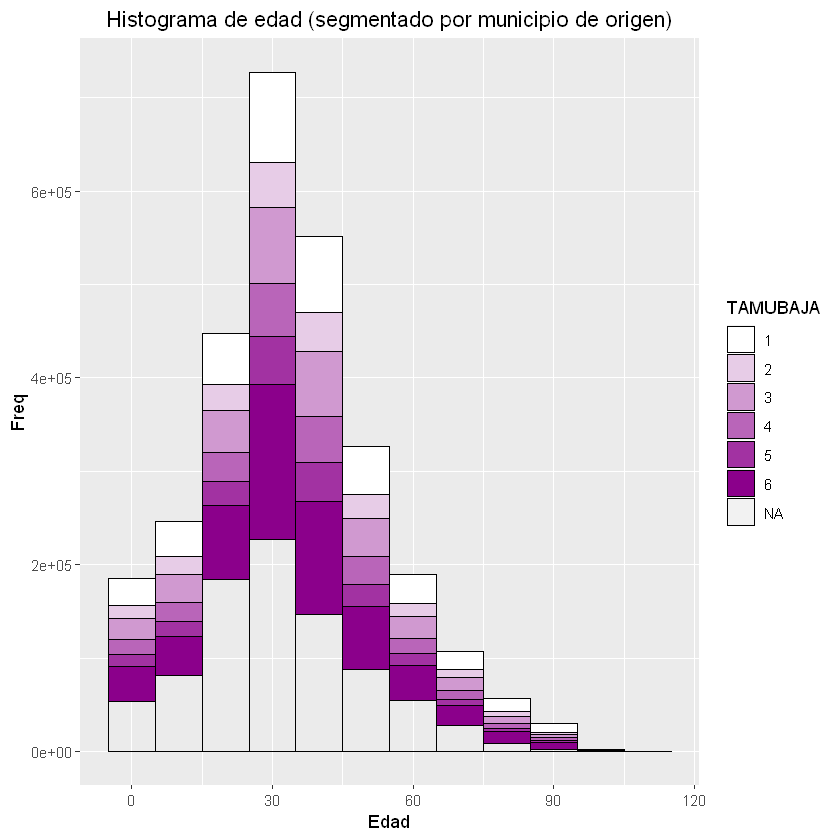

In [59]:
colfunc <- colorRampPalette(c("white","darkmagenta"))

ggplot(db, aes(x=EDAD, fill=TAMUBAJA)) +
scale_fill_manual(values=colfunc(6)) +
geom_histogram(binwidth = 10, col = "black") +
labs(title = "Histograma de edad (segmentado por municipio de origen)", x="Edad", y="Freq") +
theme(plot.title = element_text(hjust = 0.5))

## Subconjuntos de interés

### Subsets correspondientes al extranjero
Todo lo relacionado con "extranjero" se puede denifir, por lo menos, según estos tres aspectos:  
- El lugar de alta o baja
- El lugar de nacimiento
- La nacionalidad  

Ya vimos la gráfica de origen/destino provincial en variaciones con origen/destino extranjero.  
  
Sobre lugar de nacimiento/nacionalidad se puede combinar 4 categorías, de las cuales mayormente nos referimos a EX4:

1) Nacidos en extranjero (independientemente de su nacionalidad)

In [4]:
EX1 <- db[db$PROVNAC == "66",]

2) Extranjeros nacidos en España (hijos de residentes extranjeros)

In [5]:
EX2 <- db[db$CNAC != "108" & db$PROVNAC != "66",]

3) Españoles nacidos en extranjero (extranjeros nacionalizados o hijos de españoles expatriados)


In [6]:
EX3 <- db[db$CNAC == "108" & db$PROVNAC == "66",]

4) Extranjeros nacidos en extranjero (estudiantes, trabajadores, etc.)

In [7]:
EX4 <- db[db$CNAC != "108" & db$PROVNAC == "66",]

Comprobamos sus proporciones:

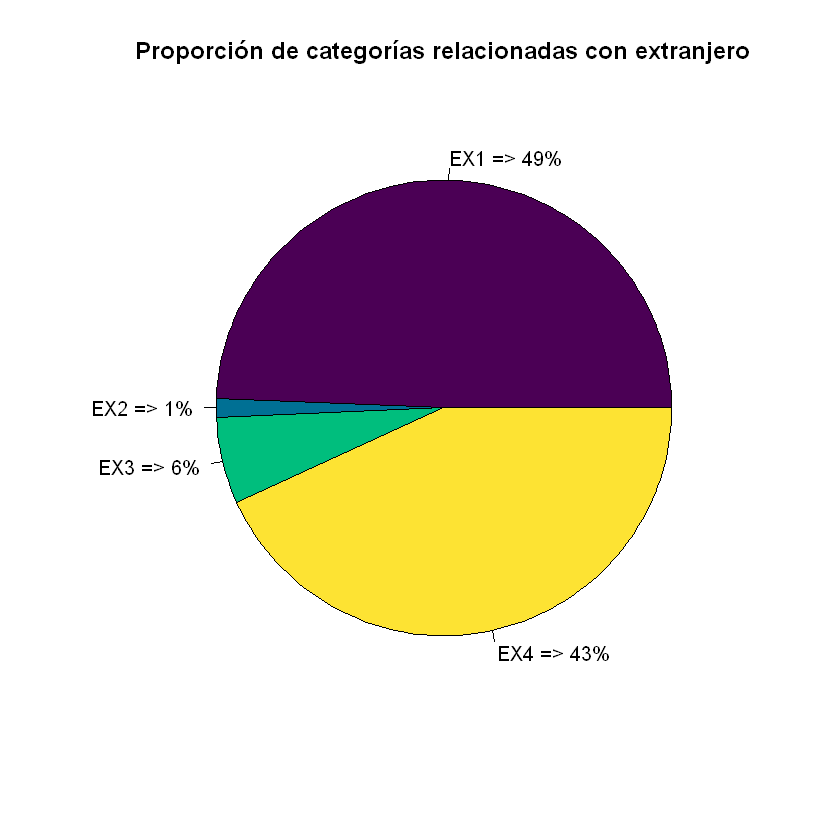

In [26]:
EX_data <- data.frame(Categoria = c("EX1","EX2","EX3","EX4"),
                      Freq = c(nrow(EX1),nrow(EX2),nrow(EX3),nrow(EX4)))

slices <- EX_data$Freq
lbl <- EX_data$Categoria
pct <- round(slices/sum(slices)*100)
lbl <- paste(lbl, "=>", pct)
lbl <- paste(lbl,"%", sep="")
pie(slices, labels = lbl, col = hcl.colors(length(lbl)),
    main="Proporción de categorías relacionadas con extranjero")

### Subsets correspondientes a Cantabria/Santander

Cantabria como provincia de origen:

In [128]:
ORIG_CANT <- db[db$PROVBAJA == "39",]

Cantabria como provincia de destino:

In [129]:
DEST_CANT <- db[db$PROVALTA == "39",]

Incluso alguno más específico:  
Cántabros (españoles nacidos en Cantabria) que se han ido de Cantabria:

In [130]:
NAC_ORIG_CANT <- db[db$CNAC == "108" & db$PROVNAC == "39" & db$PROVBAJA == "39" ,]

Santander como municipio de origen:

In [131]:
ORIG_SANT <- db[db$PROVBAJA == "39" & db$MUNIBAJA == "075",]

Santander como municipio de destino:

In [132]:
DEST_SANT <- db[db$PROVALTA == "39" & db$MUNIALTA == "075",]

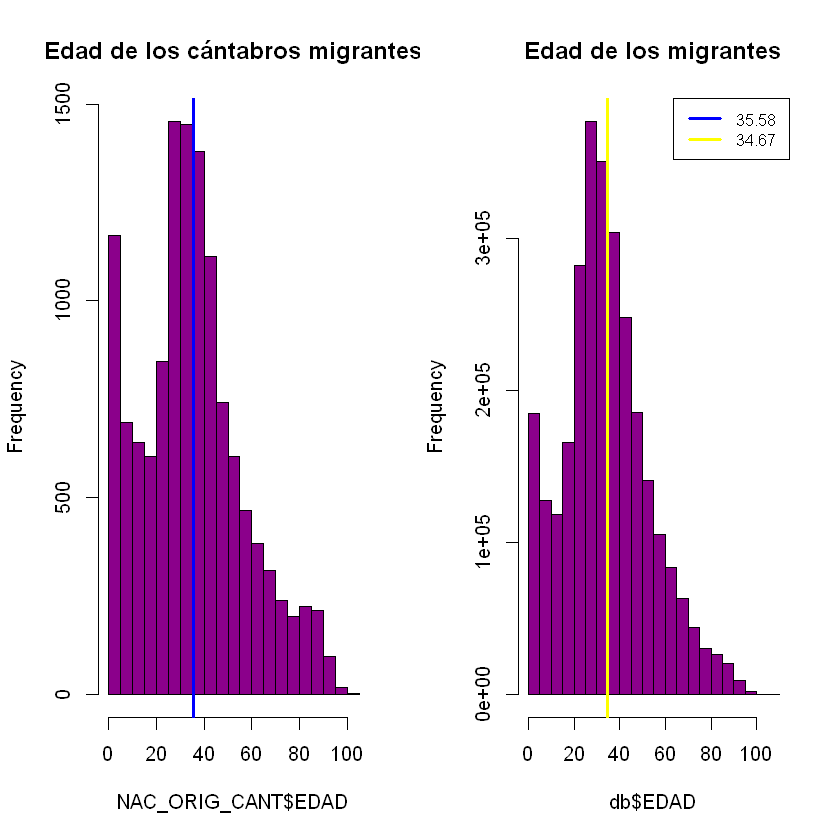

In [133]:
par(mfrow = c(1:2))

hist(NAC_ORIG_CANT$EDAD, main="Edad de los cántabros migrantes", col="darkmagenta")
abline(v=mean(NAC_ORIG_CANT$EDAD), col="blue", lwd=3)
hist(db$EDAD, main="Edad de los migrantes", col="darkmagenta")
abline(v=mean(db$EDAD), col="yellow", lwd=3)
legend("topright",
       c("35.58", "34.67"),
       col=c("blue", "yellow"),
       lwd=3, cex = 0.8, text.width = 20)

Probar la semejanza de distribuciones:

In [136]:
test <- ks.test(NAC_ORIG_CANT$EDAD, db$EDAD)
test
test$statistic

Warning message in ks.test(NAC_ORIG_CANT$EDAD, db$EDAD):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  NAC_ORIG_CANT$EDAD and db$EDAD
D = 0.044155, p-value < 2.2e-16
alternative hypothesis: two-sided


D 
0.04415526

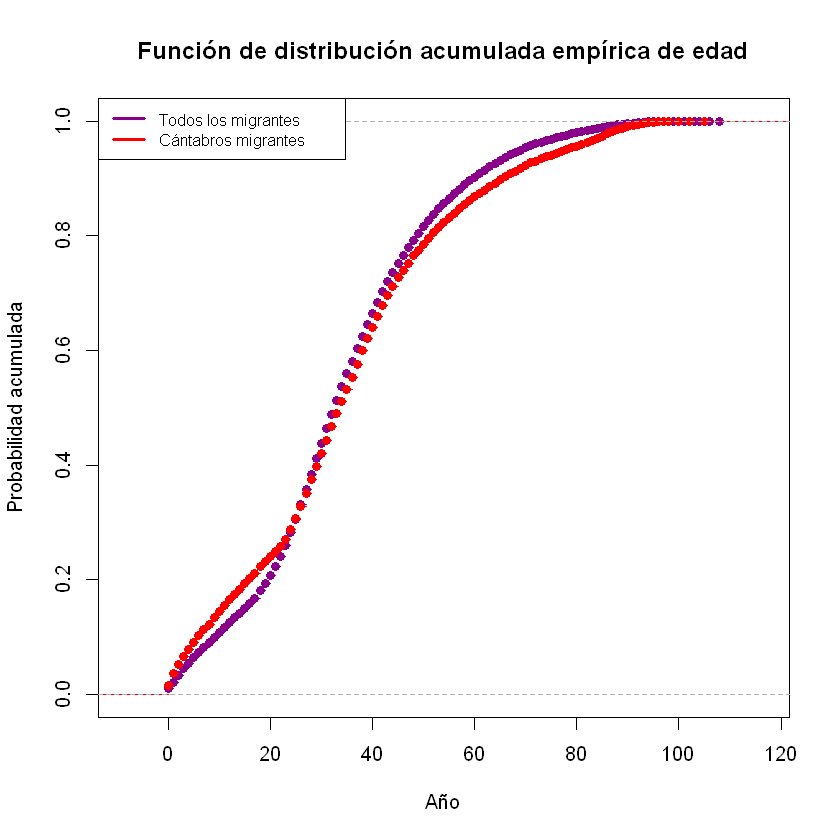

In [154]:
plot(ecdf(db$EDAD),col="darkmagenta",
     main="Función de distribución acumulada empírica de edad",
     xlab = "Año", ylab = "Probabilidad acumulada")
plot(ecdf(NAC_ORIG_CANT$EDAD), col="red", add=TRUE)

legend("topleft",
       c("Todos los migrantes","Cántabros migrantes"),
       col=c("darkmagenta", "red"),
       lwd=3, cex = 0.8, text.width = 35)

Comparar la media:

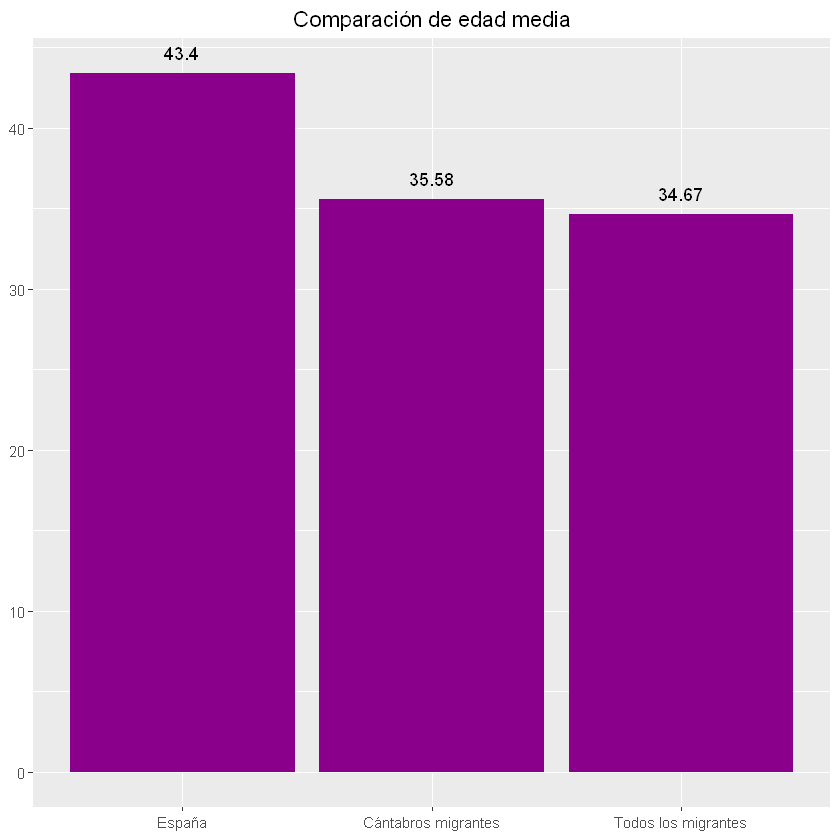

In [29]:
table <- data.frame(Categoría = c("Cántabros migrantes","Todos los migrantes","España"), Freq = c(round(mean(NAC_ORIG_CANT$EDAD),2),round(mean(db$EDAD),2),43.4))

ggplot(data=table, aes(x=reorder(Categoría, -Freq),y=Freq)) +
geom_bar(stat='identity', fill='darkmagenta') +
labs(title="Comparación de edad media") +
theme(plot.title = element_text(hjust = 0.5),axis.title.x = element_blank(), axis.title.y = element_blank()) +
geom_text(aes(label=Freq), vjust=-1)

$$
\begin{array}{c}
H_0 : \mu_c = \mu_m  = 34.67  \\\
H_1 : \mu_c > \mu_m \\\
\end{array}
$$

In [37]:
wilcox.test(NAC_ORIG_CANT$EDAD, mu=mean(db$EDAD), alternative="greater")


	Wilcoxon signed rank test with continuity correction

data:  NAC_ORIG_CANT$EDAD
V = 40962412, p-value = 0.808
alternative hypothesis: true location is greater than 34.66642


Recordando que teníamos dos subsets para variaciones INTER e INTRA provincial, podemos combinarlos también.  

Por ejemplo, para ver si hay alguna diferencia entre el perfil de las personas que se mudan a Santander, según vienen desde otros municipios de Cantabria o bien desde otras provincias.

In [37]:
DEST_SANT_INTER <- sub_inter[sub_inter$PROVALTA == "39" & sub_inter$MUNIALTA == "075",]

DEST_SANT_INTRA <- sub_intra[sub_intra$PROVALTA == "39" & sub_intra$MUNIALTA == "075",]

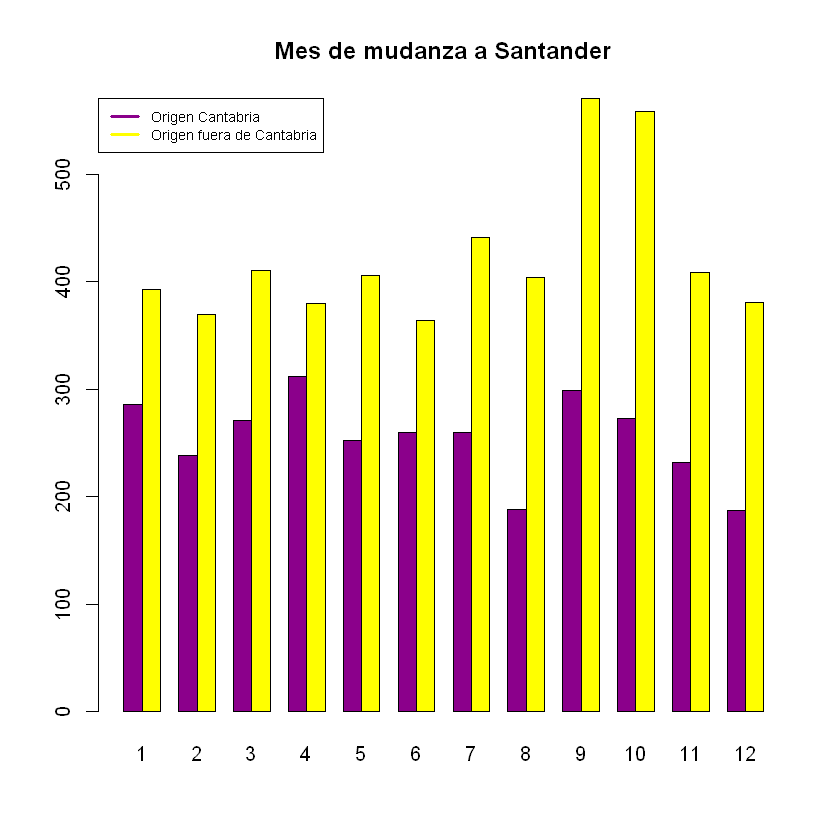

In [38]:
a <- table(DEST_SANT_INTRA$MESVAR)
b <- table(DEST_SANT_INTER$MESVAR)

c <- rbind(a,b)

barplot(c, beside=TRUE, col=c("darkmagenta","yellow"), main="Mes de mudanza a Santander")
legend("topleft",
       c("Origen Cantabria", "Origen fuera de Cantabria"),
       col=c("darkmagenta", "yellow"),
       lwd=3, cex = 0.7, text.width = 9)

### Subconjunto de altas en municipios capitales vs. no capitales:

In [7]:
cap <- db[db$TAMUALTA == 6,]
nocap <- db[db$TAMUALTA %in% 1:5,]

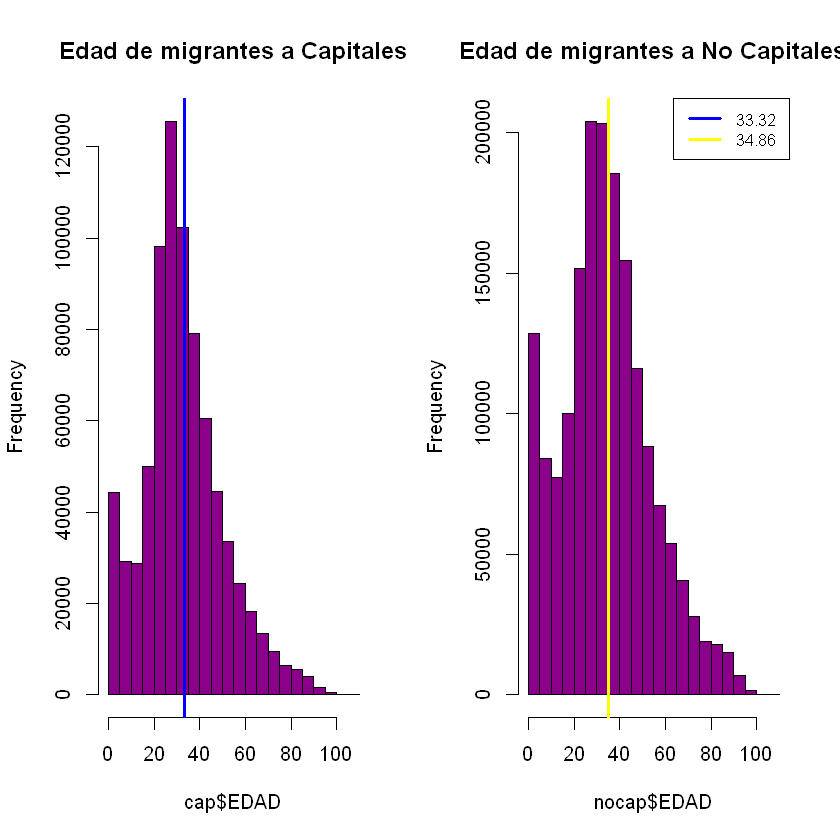

In [9]:
par(mfrow = c(1:2))

hist(cap$EDAD, col="darkmagenta", main="Edad de migrantes a Capitales")
abline(v=mean(cap$EDAD), col="blue", lwd=3)
hist(nocap$EDAD, col="darkmagenta", main="Edad de migrantes a No Capitales")
abline(v=mean(nocap$EDAD), col="yellow", lwd=3)

legend("topright",
       c("33.32","34.86"),
       col=c("blue", "yellow"),
       lwd=3, cex = 0.8, text.width = 20)

Probar la semejanza de distribuciones:

In [147]:
test <- ks.test(cap$EDAD, nocap$EDAD)
test
test$statistic

Warning message in ks.test(cap$EDAD, nocap$EDAD):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  cap$EDAD and nocap$EDAD
D = 0.069015, p-value < 2.2e-16
alternative hypothesis: two-sided


D 
0.06901524

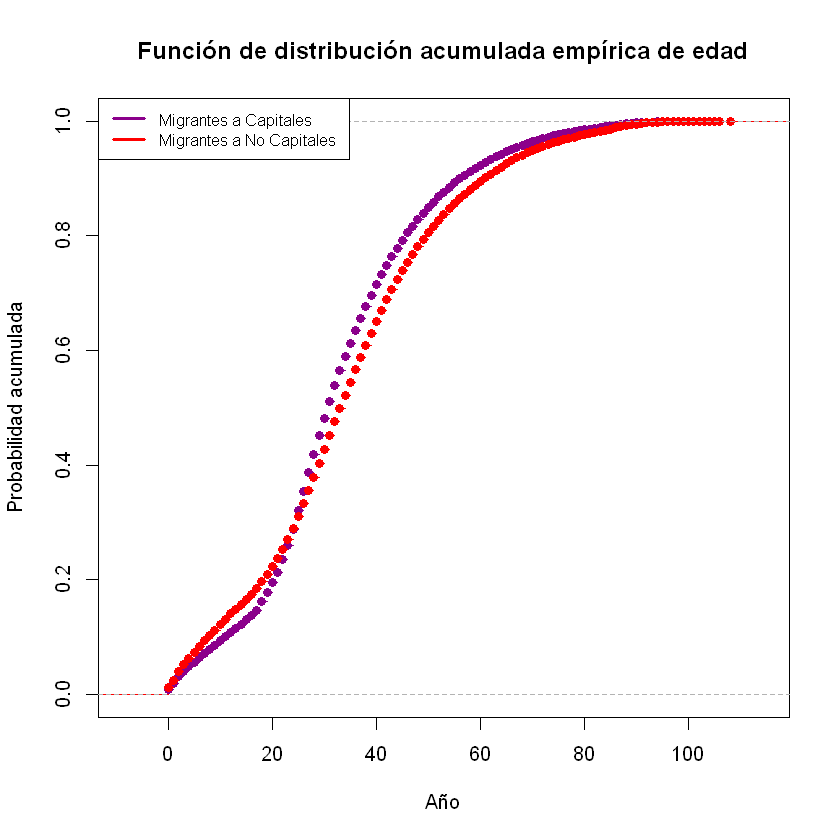

In [153]:
plot(ecdf(cap$EDAD),col="darkmagenta",
     main="Función de distribución acumulada empírica de edad",
     xlab = "Año", ylab = "Probabilidad acumulada")
plot(ecdf(nocap$EDAD), col="red", add=TRUE)

legend("topleft",
       c("Migrantes a Capitales","Migrantes a No Capitales"),
       col=c("darkmagenta", "red"),
       lwd=3, cex = 0.8, text.width = 35)

Probar la media:

$$
\begin{array}{c}
H_0 : \mu_c = \mu_n  \\\
H_1 : \mu_c != \mu_n \\\
\end{array}
$$

In [44]:
wilcox.test(cap$EDAD, mu=mean(nocap$EDAD), alternative="less")


	Wilcoxon signed rank test with continuity correction

data:  cap$EDAD
V = 1.268e+11, p-value < 2.2e-16
alternative hypothesis: true location is less than 34.86468


Proporción de alta en capital vs. no capital según nacionalidad:

In [8]:
cap$NAC <- ifelse(cap$CNAC == "108", "ESP", "EXT")
nocap$NAC <- ifelse(nocap$CNAC == "108", "ESP", "EXT")

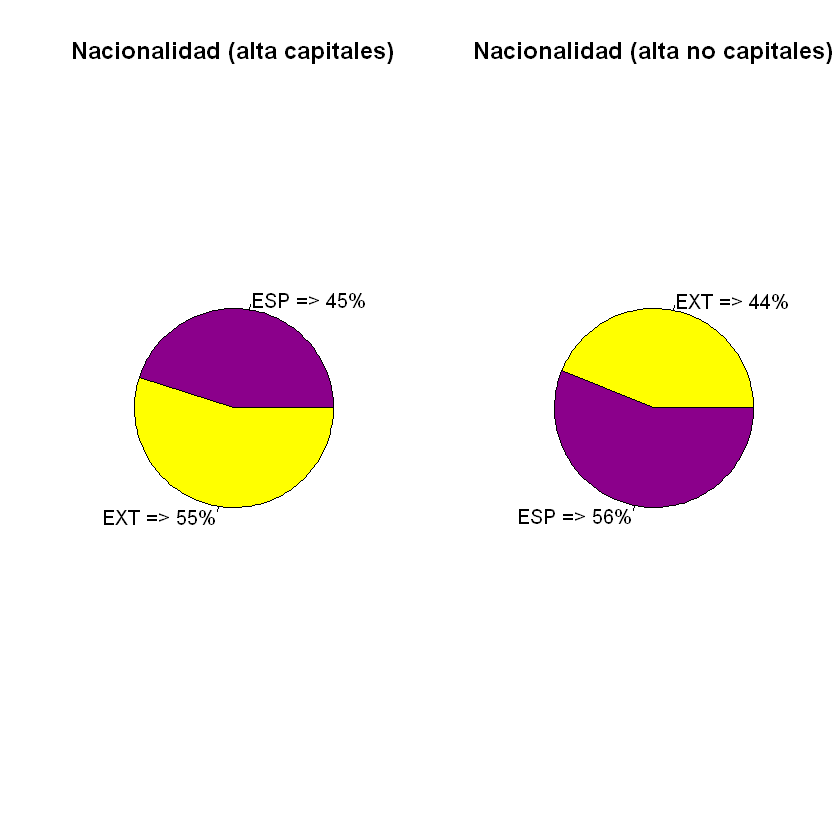

In [9]:
par(mfrow = c(1:2))

aux <- sort(table(cap$NAC))
aux <- as.data.frame(aux)

slices <- aux$Freq
lbl <- aux$Var1
pct <- round(slices/sum(slices)*100)
lbl <- paste(lbl, "=>", pct)
lbl <- paste(lbl,"%", sep="")
pie(slices, labels = lbl, col = c("darkmagenta","yellow"),
    main="Nacionalidad (alta capitales)")

aux <- sort(table(nocap$NAC))
aux <- as.data.frame(aux)

slices <- aux$Freq
lbl <- aux$Var1
pct <- round(slices/sum(slices)*100)
lbl <- paste(lbl, "=>", pct)
lbl <- paste(lbl,"%", sep="")
pie(slices, labels = lbl, col = c("yellow","darkmagenta"),
    main="Nacionalidad (alta no capitales)")

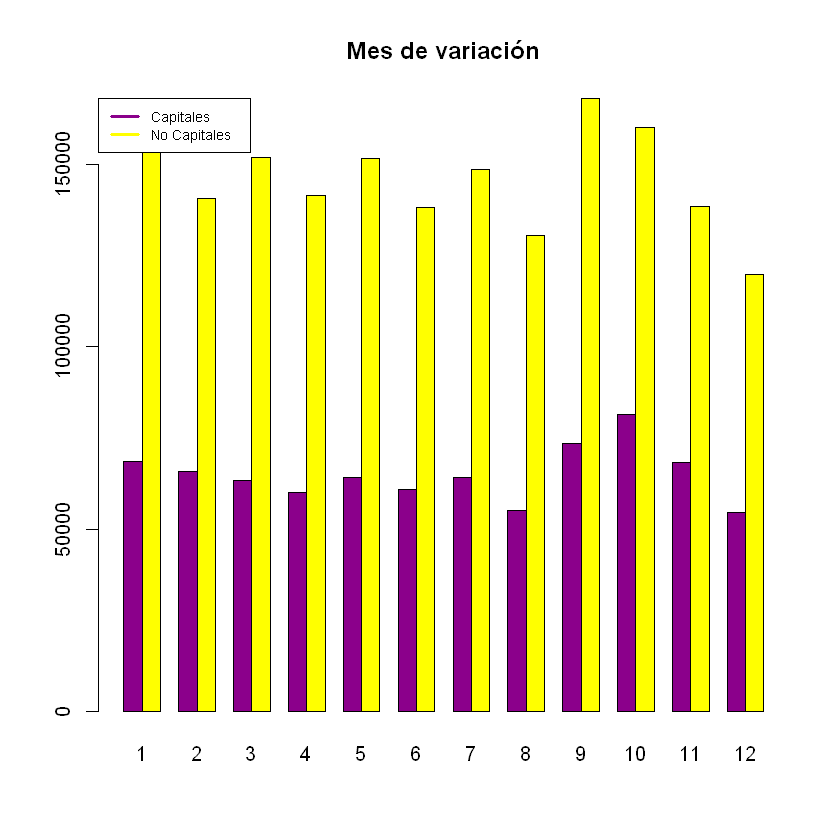

In [25]:
a <- table(cap$MESVAR)
b <- table(nocap$MESVAR)

c <- rbind(a,b)

barplot(c, beside=TRUE, col=c("darkmagenta","yellow"), main="Mes de variación")
legend("topleft",
       c("Capitales", "No Capitales"),
       col=c("darkmagenta", "yellow"),
       lwd=3, cex = 0.7, text.width = 5)